In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

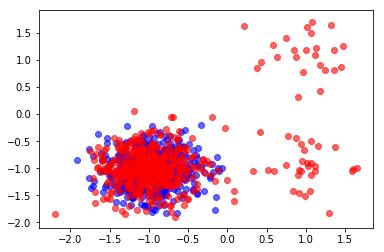

In [34]:
def build_toy_dataset(N, pi):
#   pi = np.array([0.1, 0.9])
  mus = [[1, 1], [-1, -1], [1, -1]]
  stds = [[0.1, 0.1], [0.1, 0.1], [0.1, 0.1]]
  x = np.zeros((N, 2), dtype=np.float32)
  for n in range(N):
    k = np.argmax(np.random.multinomial(1, pi))
    x[n, :] = np.random.multivariate_normal(mus[k], np.diag(stds[k]))
 
  return x
 
N = 500  # number of data points
ndim = 2  # dimensionality of data

x_train = build_toy_dataset(N, np.array([0.0, 1.0, 0]))
x_test = build_toy_dataset(N, np.array([0.05, 0.9, 0.05]))

plt.scatter(x_train[:, 0], x_train[:, 1], color="blue", alpha=0.6)
plt.scatter(x_test[:, 0], x_test[:, 1], color="red", alpha=0.6)
plt.show()

In [35]:
mu = (1/N) * np.sum(x_train, 0)
sigma = (1/N) * np.dot((x_train - mu).T, (x_train - mu)) 
a = np.diag(np.dot(np.dot((x_test - mu), np.linalg.inv(sigma)), (x_test - mu).T))  # 異常度の算出

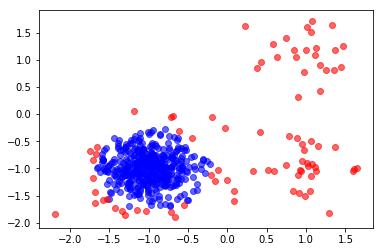

In [37]:
a_rate = 0.1  # 誤報率
thre = stats.chi2.interval(alpha=1-a_rate, df=ndim, scale=1)

ind = a > thre[1]
ind = ind.reshape(-1)

anomaly = x_test[ind, :]
normal = x_test[np.logical_not(ind), :]

plt.scatter(normal[:, 0], normal[:, 1], color="blue", alpha=0.6)
plt.scatter(anomaly[:, 0], anomaly[:, 1], color="red", alpha=0.6)

plt.show()